<a href="https://colab.research.google.com/github/leonardoapolinario/simpleLinearRegression/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regressão Linear Simples / Simple Linear Regression

Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Fazendo o download dos dados 

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-02-04 17:39:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2022-02-04 17:39:15 (2.15 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Fazendo a leitura dos dados

In [3]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Exploração descritiva dos dados

In [4]:
#sumarizar os dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selecionar algumas características

In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plotar essas características

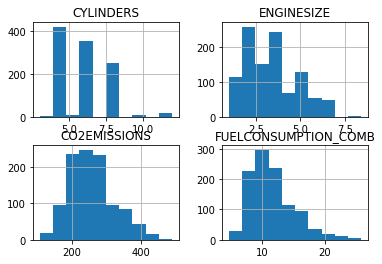

In [6]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Plotar as features vs a emissão de CO2 e verificar quão linear é a relação

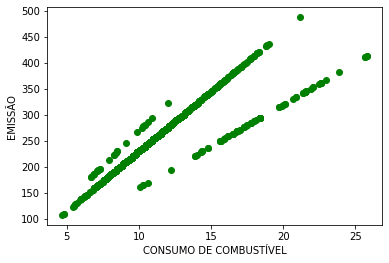

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="green")
plt.xlabel("CONSUMO DE COMBUSTÍVEL")
plt.ylabel("EMISSÃO")
plt.show()

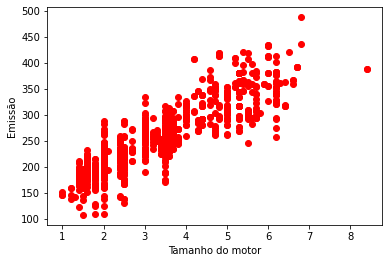

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="red")
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissão")
plt.show()

Quantidade de cilindros VS Emissão

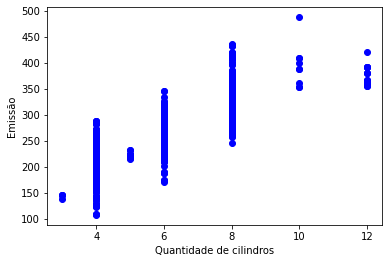

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,color="blue")
plt.xlabel("Quantidade de cilindros")
plt.ylabel("Emissão")
plt.show()

Criando e testando o dataSet

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Modelo de regressão linear simples
ajusta um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a soma residual dos quadrados entre o valor real y no dataset e o valor previsto yhat usando aproximação linear

Distribuição dos dados do treinamento

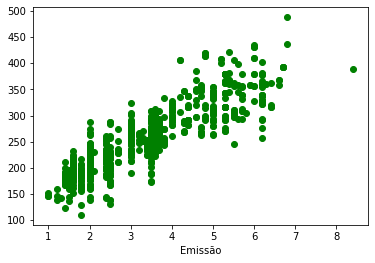

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="green")
plt.xlabel("Tamanho do motor")
plt.xlabel("Emissão")
plt.show()

Fazendo a modelagem
Usando o pacote sklearn para modelar os dados

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
#Coeficientes
print('Coeficientes: ', regr.coef_)
print('Intercepto: ', regr.intercept_)

Coeficientes:  [[38.75316437]]
Intercepto:  [126.1601092]


Coeficiente e intercepto são os parâmetros da linha ajustada. Dado que temos uma regressão linear simples com apenas 2 parâmetros, e sabendo que os parâmetros são o intercepto e a inclinação da linha , sklearn pode estimá-los diretamente dos nossos dados. 

####Plotando as saídas

Plotando a linha ajustada sobre os dados